In [349]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
import statsmodels.api as sm

import matplotlib.pyplot as plt
from sklearn.linear_model import  LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
raw = pd.read_excel('연소득과주택소유.xlsx')

In [3]:
data = raw.copy()

In [4]:
data

,Record,Income,House
0,1,12,0
1,2,18,0
2,3,21,0
3,4,22,0
4,5,22,0
...,...,...,...
95,96,93,1
96,97,93,1
97,98,94,1
98,99,95,1


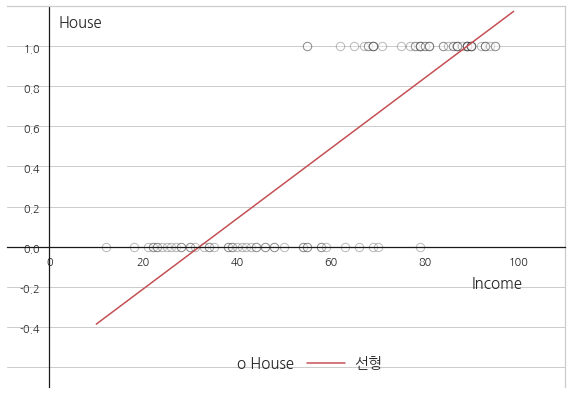

In [253]:
model = ols('House ~ Income', data=data).fit()

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(10, 100), np.arange(10, 100) * model.params[1] + model.params[0], color='r')
ax.scatter(data.Income, data.House, marker='o', c='w', s=70, linewidths=1, edgecolor='k', alpha=0.3)
plt.xlim(-9, 110)
plt.ylim(-0.7, 1.2)
plt.xticks(color='w')
plt.yticks(color='w')
plt.grid(None, axis='x')

ax.spines['left'].set_color('k')
ax.spines['left'].set_position('zero')

ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_position('zero')

ax.set_yticks([round(-0.6 + (i*0.2),2) for i in range(0, 9)])
ax.set_yticklabels(['']+[round(-0.4 + (i*0.2),2) for i in range(0, 8)])

plt.text(2, 1.1, 'House', fontsize=15)
plt.text(90, -0.2, 'Income', fontsize=15)
plt.text(40, -0.6, 'o House', fontsize=15)
plt.text(65, -0.6, '선형', fontsize=15)
plt.plot([55, 63], [-0.58, -0.58], color='r')
plt.show()

In [6]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  House   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           2.03e-28
Time:                        21:12:04   Log-Likelihood:                -9.7372
No. Observations:                 100   AIC:                             23.47
Df Residuals:                      98   BIC:                             28.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5625      0.075     -7.520      0.0

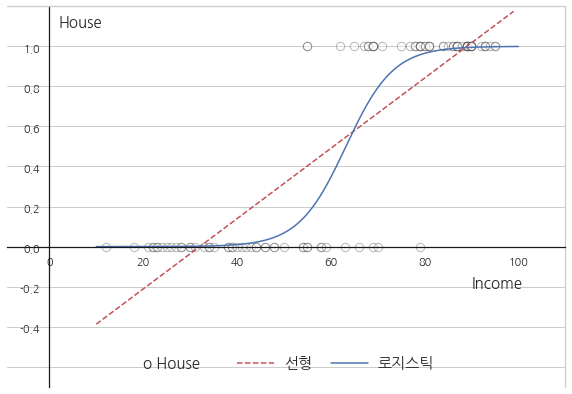

In [242]:
logit_model_1 = LogisticRegression()
logit_model_1.fit(np.reshape(data.Income.values, (-1, 1)), data.House)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(10, 100), np.arange(10, 100) * model.params[1] + model.params[0], color='r', linestyle='--')
ax.scatter(data.Income, data.House, marker='o', c='w', s=70, linewidths=1, edgecolor='k', alpha=0.3)
xx = np.linspace(10, 100, 1000)
ax.plot(xx, 1/(1+np.exp(-(xx*logit_model_1.coef_ + logit_model_1.intercept_)))[0], color='b')

plt.xlim(-9, 110)
plt.ylim(-0.7, 1.2)
plt.xticks(color='w')
plt.yticks(color='w')
plt.grid(None, axis='x')

ax.spines['left'].set_color('k')
ax.spines['left'].set_position('zero')

ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_position('zero')

ax.set_yticks([round(-0.6 + (i*0.2),2) for i in range(0, 9)])
ax.set_yticklabels(['']+[round(-0.4 + (i*0.2),2) for i in range(0, 8)])

plt.text(2, 1.1, 'House', fontsize=15)
plt.text(90, -0.2, 'Income', fontsize=15)

plt.text(20, -0.6, 'o House', fontsize=15)

plt.plot([40, 48], [-0.58, -0.58], color='r', linestyle='--')
plt.text(50, -0.6, '선형', fontsize=15)

plt.plot([60, 68], [-0.58, -0.58], color='b')
plt.text(70, -0.6, '로지스틱', fontsize=15)
plt.show()

In [243]:
logit_model_1.coef_

array([[0.19795723]])

In [244]:
logit_model_1.intercept_

array([-12.51673662])

In [219]:
logit_model_2 = logit('House ~ Income', data=data).fit()
print(logit_model_2.summary())

Optimization terminated successfully.
         Current function value: 0.179405
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  House   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Jan 2022   Pseudo R-squ.:                  0.7405
Time:                        23:12:36   Log-Likelihood:                -17.941
converged:                       True   LL-Null:                       -69.135
Covariance Type:            nonrobust   LLR p-value:                 4.564e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.5421      2.920     -4.295      0.000     -18.266      -6.819
Income         0.1983      0.

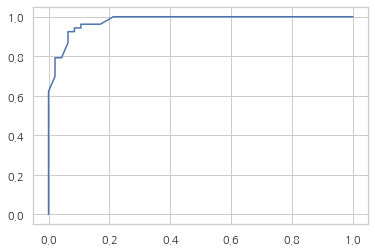

In [267]:
fpr_1, tpr_1, thresholds_1 = roc_curve(data.House, [item[1] for item in logit_model_1.predict_proba(np.reshape(data.Income.values, (-1, 1)))])
plt.plot(fpr_1, tpr_1)
plt.show()

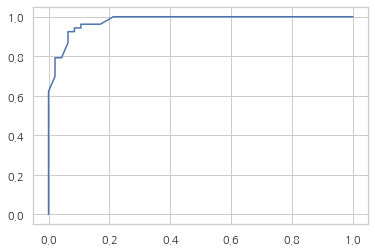

In [268]:
fpr_2, tpr_2, thresholds_2 = roc_curve(data.House, logit_model_2.predict(data.Income))
plt.plot(fpr_2, tpr_2)
plt.show()

In [278]:
dist = []
for x,y in zip(fpr_1, tpr_1):
    dist.append(((0-x)**2) + ((1-y)**2))
dist.index(min(dist))

20

In [280]:
thresholds_1[20]

0.6783933222593441

In [279]:
dist = []
for x,y in zip(fpr_2, tpr_2):
    dist.append(((0-x)**2) + ((1-y)**2))
dist.index(min(dist))

20

In [277]:
thresholds_2[20]

0.6785842243067552

In [307]:
y_pred_1 = logit_model_1.predict(np.reshape(data.Income.values, (-1, 1)))
print(confusion_matrix(data.House, y_pred_1))
print(classification_report(data.House, y_pred_1))

[[43  4]
 [ 3 50]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.93      0.94      0.93        53

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [310]:
confusion = confusion_matrix(data.House, y_pred_1)
TN = confusion[0][0]
FN = confusion[0][1]
FP = confusion[1][0]
TP = confusion[1][1]
acc = (TN + TP) / (TN+FN+FP+TP)
sens = TP / (TP+FN)
spec = TN / (TN+FP)
print(f'적중율: {round(acc*100, 2)}\n민감도: {round(sens*100, 2)}\n특이도: {round(spec*100, 2)}')

적중율: 93.0
민감도: 92.59
특이도: 93.48


In [320]:
y_pred_2 = [1 if pos_prob >= 0.6783933222593441 else 0 for neg_prob, pos_prob in logit_model_1.predict_proba(np.reshape(data.Income.values, (-1, 1)))]
print(confusion_matrix(data.House, y_pred_2))
print(classification_report(data.House, y_pred_2))

[[44  3]
 [ 4 49]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        47
           1       0.94      0.92      0.93        53

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [321]:
confusion = confusion_matrix(data.House, y_pred_2)
TN = confusion[0][0]
FN = confusion[0][1]
FP = confusion[1][0]
TP = confusion[1][1]
acc = (TN + TP) / (TN+FN+FP+TP)
sens = TP / (TP+FN)
spec = TN / (TN+FP)
print(f'적중율: {round(acc*100, 2)}\n민감도: {round(sens*100, 2)}\n특이도: {round(spec*100, 2)}')

적중율: 93.0
민감도: 94.23
특이도: 91.67


In [313]:
print(92.59 - 94.23)
print(93.48 - 91.67)

-1.6400000000000006
1.8100000000000023


In [335]:
from sklearn.model_selection import train_test_split

In [326]:
kid_raw = pd.read_csv('KidCreative.csv')

In [331]:
kid = kid_raw.copy()
kid.columns = ['_'.join(col.replace('.','').lower().split()) for col in kid.columns]

In [332]:
kid

,obs_no,buy,income,is_female,is_married,has_college,is_professional,is_retired,unemployed,residence_length,dual_income,minors,own,house,white,english,prev_child_mag,prev_parent_mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,669,0,27000,1,0,0,0,0,0,6,0,1,1,1,1,1,0,0
669,670,0,3000,1,0,0,0,0,0,11,0,1,0,1,0,1,0,0
670,671,1,75000,1,1,0,1,0,0,52,0,0,1,1,1,1,0,0
671,672,1,51000,1,1,0,1,0,0,10,1,1,1,1,1,1,0,0


In [334]:
kid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   obs_no            673 non-null    int64
 1   buy               673 non-null    int64
 2   income            673 non-null    int64
 3   is_female         673 non-null    int64
 4   is_married        673 non-null    int64
 5   has_college       673 non-null    int64
 6   is_professional   673 non-null    int64
 7   is_retired        673 non-null    int64
 8   unemployed        673 non-null    int64
 9   residence_length  673 non-null    int64
 10  dual_income       673 non-null    int64
 11  minors            673 non-null    int64
 12  own               673 non-null    int64
 13  house             673 non-null    int64
 14  white             673 non-null    int64
 15  english           673 non-null    int64
 16  prev_child_mag    673 non-null    int64
 17  prev_parent_mag   673 non-null    i

In [333]:
kid.describe()

,obs_no,buy,income,is_female,is_married,has_college,is_professional,is_retired,unemployed,residence_length,dual_income,minors,own,house,white,english,prev_child_mag,prev_parent_mag
count,673.00000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,337.00000,0.185736,35078.751857,0.551263,0.349183,0.289747,0.341753,0.057949,0.031204,17.618128,0.231798,0.364042,0.362556,0.667162,0.692422,0.909361,0.071322,0.084695
std,194.42265,0.389182,23812.787498,0.497735,0.477066,0.453982,0.474650,0.233822,0.173997,13.555818,0.422294,0.481518,0.481096,0.471580,0.461834,0.287308,0.257554,0.278635
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169.00000,0.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,337.00000,0.000000,32000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,505.00000,0.000000,52000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,24.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,673.00000,1.000000,75000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [421]:
i = 1
X = kid.drop('buy', axis=1)
y = kid.buy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=i)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=i)

In [417]:
sm.add_constant(X_train)

,const,obs_no,income,is_female,is_married,has_college,is_professional,is_retired,unemployed,residence_length,dual_income,minors,own,house,white,english,prev_child_mag,prev_parent_mag
361,1.0,362,3000,1,0,0,0,0,0,10,0,1,0,1,1,1,0,0
324,1.0,325,23000,1,0,0,0,0,0,13,0,0,0,0,1,1,0,0
395,1.0,396,72000,0,0,0,0,0,0,24,0,0,0,1,1,1,1,0
668,1.0,669,27000,1,0,0,0,0,0,6,0,1,1,1,1,1,0,0
205,1.0,206,75000,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1.0,283,2000,1,0,0,0,0,0,17,0,1,0,1,0,1,0,0
257,1.0,258,75000,1,0,1,1,0,0,17,0,0,1,1,1,1,0,0
515,1.0,516,58000,0,1,0,0,0,0,13,1,0,1,1,1,1,0,0
399,1.0,400,75000,1,1,0,1,0,0,29,0,0,1,1,1,1,0,0


In [459]:
# a_model: 모든 변수를 사용한 모델
y = y_train
x = sm.add_constant(X_train)
a_model = sm.GLM(y, x, family=sm.families.Binomial()).fit()
print(a_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    buy   No. Observations:                  403
Model:                            GLM   Df Residuals:                      385
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.345
Date:                Sun, 06 Feb 2022   Deviance:                       80.689
Time:                        12:41:17   Pearson chi2:                     122.
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -22.7702      4.258  

In [372]:
def get_accuracy(answer, pred):
    pred = [1 if val >= 0.5 else 0 for val in pred]
    confusion = confusion_matrix(answer, pred)
    TN = confusion[0][0]
    FN = confusion[0][1]
    FP = confusion[1][0]
    TP = confusion[1][1]
    acc = (TN + TP) / (TN+FN+FP+TP)
    return acc

In [373]:
get_accuracy(y_test, a_model.predict(X_test))

0.8518518518518519

## 모델 함수와 상수항 포함 여부에 따른 aic 변화 확인

### sm.GLM.from_formula()
- family=sm.families.Binomial()

In [506]:
# 독립변수: 1
sm.GLM.from_formula('buy ~ 1',data=pd.concat([y_train, sm.add_constant(X_train)], axis=1), family=sm.families.Binomial()).fit().aic

389.30272479858155

In [507]:
# 독립변수: constant
sm.GLM.from_formula('buy ~ const',data=pd.concat([y_train, sm.add_constant(X_train)], axis=1), family=sm.families.Binomial()).fit().aic

389.3027247985817

### -> 독립변수가 1일때의 aic값과 add_constant로 1인 값을 넣어주었을 때의 aic 값은 거의 동일함

In [511]:
# 독립변수: 1 + constant
sm.GLM.from_formula('buy ~ const+income',data=pd.concat([y_train, sm.add_constant(X_train)], axis=1), family=sm.families.Binomial()).fit().aic

161.11123338684115

In [512]:
# 독립변수: constant + 1
sm.GLM.from_formula('buy ~ income+const',data=pd.concat([y_train, sm.add_constant(X_train)], axis=1), family=sm.families.Binomial()).fit().aic

161.11123338684112

### -> formula에서 독립 변수의 순서는 바꾸어도 차이가 없다

In [495]:
# income
sm.GLM.from_formula('buy ~ income',data=pd.concat([y_train, sm.add_constant(X_train)], axis=1), family=sm.families.Binomial()).fit().aic

161.11123338684112

In [496]:
sm.GLM.from_formula('buy ~ const+income',data=pd.concat([y_train, sm.add_constant(X_train)], axis=1), family=sm.families.Binomial()).fit().aic

161.11123338684115

### intercept(constant)는 항상 필요하기 때문에 fomula의 우측에 항상 숨겨져 있다.
- https://patsy.readthedocs.io/en/latest/formulas.html#the-formula-language
- Intercept handling

There are two special things about how intercept terms are handled inside the formula parser.

First, since an intercept term is an interaction of zero factors, we have no way to write it down using the parts of the language described so far. Therefore, as a special case, the string 1 is taken to represent the intercept term.

Second, since intercept terms are almost always wanted and remembering to include them by hand all the time is quite tedious, they are always included by default in the right-hand side of any formula. The way this is implemented is exactly as if there is an invisible 1 + inserted at the beginning of every right-hand side.

Of course, if you don’t want an intercept, you can remove it again just like any other unwanted term, using the - operator. The only thing that’s special about the 1 + is that it’s invisible; otherwise it acts just like any other term. This formula has an intercept:

## sm.GLM()
- family=sm.families.Binomial()

In [497]:
# 독립변수: constant
sm.GLM(y_train, sm.add_constant(X_train[[]]), family=sm.families.Binomial()).fit().aic

389.30272479858155

In [498]:
# 독립변수: constant+income
sm.GLM(y_train, sm.add_constant(X_train[['income']]), family=sm.families.Binomial()).fit().aic

161.1112333868411

In [499]:
# 독립변수: income
sm.GLM(y_train, X_train[['income']], family=sm.families.Binomial()).fit().aic

540.3273404517961

### -> formula가 아닌 경우 intercept(constant)를 명시적으로 포함시켜주어야 함

## logit()

In [517]:
# 독립변수: 1
logit('buy ~ 1',data=pd.concat([y_train, sm.add_constant(X_train)], axis=1)).fit().aic

Optimization terminated successfully.
         Current function value: 0.480524
         Iterations 5


389.3027247985816

In [518]:
# 독립변수: income
logit('buy ~ income',data=pd.concat([y_train, sm.add_constant(X_train)], axis=1)).fit().aic

Optimization terminated successfully.
         Current function value: 0.194927
         Iterations 9


161.11123338684115

In [502]:
# 독립변수: 1+income
logit('buy ~ 1+income',data=pd.concat([y_train, sm.add_constant(X_train)], axis=1)).fit().aic

Optimization terminated successfully.
         Current function value: 0.194927
         Iterations 9


161.11123338684115

### -> formula를 사용하는 경우 logit 함수와 GLM함수의 결과는 동일하다

In [554]:
# s_model: 양방향 선택

target_features = X_train.columns.tolist()
selected_features = []
y = y_train
x = sm.add_constant(X_train)

for i in range(len(target_features)):
    temp = pd.DataFrame(columns=['feature', 'AIC'])
    print(', '.join(selected_features) )
    start_model = sm.GLM(y, x[['const']+selected_features], family=sm.families.Binomial()).fit()
    temp = temp.append(pd.Series(['<none>', start_model.aic], index=['feature', 'AIC']), ignore_index=True)
    for t_feature in target_features:
        temp_model = sm.GLM(y, x[['const']+selected_features+[t_feature]], family=sm.families.Binomial()).fit()
        temp = temp.append(pd.Series([' + '+t_feature, temp_model.aic], index=['feature', 'AIC']), ignore_index=True)
    if i > 0:
        for s_feature in selected_features:
            temp_model = sm.GLM(y, x[['const']+[f for f in selected_features if f != s_feature]], family=sm.families.Binomial()).fit()
            temp = temp.append(pd.Series([' - '+s_feature, temp_model.aic], index=['feature', 'AIC']), ignore_index=True)
    temp.sort_values('AIC', inplace=True)
#     display(temp)
    top_feature = temp.iloc[0, 0]
    if top_feature.startswith(' +'):
        selected_features.append(top_feature[3:])
        target_features.remove(top_feature[3:])
    elif top_feature.startswith(' -'):
        selected_features.remove(top_feature[3:])
    else:
        break


income
income, is_female
income, is_female, is_married
income, is_female, is_married, is_retired
income, is_female, is_married, is_retired, white
income, is_female, is_married, is_retired, white, prev_child_mag
income, is_female, is_married, is_retired, white, prev_child_mag, prev_parent_mag


In [555]:
# p_model: Pr(>|z|)가 유의한 변수를 사용한 모델
x = sm.add_constant(X_train)
drop_cols = []
while True:
    p_model = sm.GLM(y_train, x, family=sm.families.Binomial()).fit()
    drop_cols =  p_model.pvalues.index[p_model.pvalues > 0.05]
    if len(drop_cols):
        x.drop(drop_cols, axis=1, inplace=True)
    else:
        break
print(p_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    buy   No. Observations:                  403
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -56.311
Date:                Sun, 06 Feb 2022   Deviance:                       112.62
Time:                        19:02:44   Pearson chi2:                     184.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -15.3672      2.230     

In [605]:
acc = pd.DataFrame(columns=['train_a', 'train_s', 'train_p', 'val_a', 'val_s', 'val_p', 'test_a', 'test_s', 'test_p'])
for i in range(10):
    X = kid.drop('buy', axis=1)
    y = kid.buy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=i)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=i)

    # a_model: 모든 변수를 사용한 모델
    x = sm.add_constant(X_train)
    a_model = sm.GLM(y_train, x, family=sm.families.Binomial()).fit()

    # s_model: 양방향 선택
    target_features = X_train.columns.tolist()
    selected_features = []
    x = sm.add_constant(X_train)

    for j in range(len(target_features)):
        temp = pd.DataFrame(columns=['feature', 'AIC'])
    #     print(', '.join(selected_features) )
        start_model = sm.GLM(y_train, x[['const']+selected_features], family=sm.families.Binomial()).fit()
        temp = temp.append(pd.Series(['<none>', start_model.aic], index=['feature', 'AIC']), ignore_index=True)
        for t_feature in target_features:
            temp_model = sm.GLM(y_train, x[['const']+selected_features+[t_feature]], family=sm.families.Binomial()).fit()
            temp = temp.append(pd.Series([' + '+t_feature, temp_model.aic], index=['feature', 'AIC']), ignore_index=True)
        if j > 0:
            for s_feature in selected_features:
                temp_model = sm.GLM(y_train, x[['const']+[f for f in selected_features if f != s_feature]], family=sm.families.Binomial()).fit()
                temp = temp.append(pd.Series([' - '+s_feature, temp_model.aic], index=['feature', 'AIC']), ignore_index=True)
        temp.sort_values('AIC', inplace=True)
    #     display(temp)
        top_feature = temp.iloc[0, 0]
        if top_feature.startswith(' +'):
            selected_features.append(top_feature[3:])
            target_features.remove(top_feature[3:])
        elif top_feature.startswith(' -'):
            selected_features.remove(top_feature[3:])
        else:
            break
    s_model = sm.GLM(y_train, x[['const']+selected_features], family=sm.families.Binomial()).fit()

    # p_model: Pr(>|z|)가 유의한 변수를 사용한 모델
    x = sm.add_constant(X_train)
    drop_cols = []
    while True:
        p_model = sm.GLM(y_train, x, family=sm.families.Binomial()).fit()
        drop_cols =  p_model.pvalues.index[p_model.pvalues > 0.05]
        if len(drop_cols):
            x.drop(drop_cols, axis=1, inplace=True)
        else:
            break

    acc_train_a = get_accuracy(y_train, a_model.predict(sm.add_constant(X_train)))
    acc_train_s = get_accuracy(y_train, s_model.predict(sm.add_constant(X_train[selected_features])))
    acc_train_p = get_accuracy(y_train, p_model.predict(sm.add_constant(X_train)[p_model.params.index]))
    
    acc_val_a = get_accuracy(y_val, a_model.predict(sm.add_constant(X_val)))
    acc_val_s = get_accuracy(y_val, s_model.predict(sm.add_constant(X_val[selected_features])))
    acc_val_p = get_accuracy(y_val, p_model.predict(sm.add_constant(X_val)[p_model.params.index]))
    
    acc_test_a = get_accuracy(y_test, a_model.predict(sm.add_constant(X_test)))
    acc_test_s = get_accuracy(y_test, s_model.predict(sm.add_constant(X_test[selected_features])))
    acc_test_p = get_accuracy(y_test, p_model.predict(sm.add_constant(X_test)[p_model.params.index]))

    acc = acc.append(pd.Series([round(val*100, 2) for val in [acc_train_a, acc_train_s, acc_train_p, 
                                                              acc_val_a, acc_val_s, acc_val_p, 
                                                              acc_test_a, acc_test_s, acc_test_p]], index=['train_a', 'train_s', 'train_p', 
                                                                                                           'val_a', 'val_s', 'val_p',
                                                                                                           'test_a', 'test_s', 'test_p']), ignore_index=True)

In [606]:
acc = pd.concat([acc, pd.DataFrame(acc.mean(), columns=['AVG']).T])
acc

,train_a,train_s,train_p,val_a,val_s,val_p,test_a,test_s,test_p
0,96.030,96.030,95.040,87.410,91.110,92.590,89.630,88.890,91.110
1,95.530,95.530,93.550,89.630,89.630,88.150,88.890,88.890,92.590
2,94.540,93.550,95.040,89.630,91.110,90.370,91.850,92.590,94.070
3,94.790,93.550,92.800,94.070,94.810,94.810,92.590,91.110,89.630
4,94.790,94.790,93.050,90.370,91.850,91.850,91.850,91.110,91.850
5,94.040,93.550,93.050,91.110,91.110,90.370,92.590,91.850,92.590
6,94.290,93.050,91.810,94.070,95.560,95.560,91.850,91.850,91.850
7,95.780,95.290,95.040,92.590,93.330,91.850,91.850,92.590,93.330
8,93.550,94.040,93.050,93.330,94.070,91.110,93.330,94.070,95.560
9,96.030,94.790,94.540,89.630,90.370,88.890,91.850,94.070,94.070
